### This approach is used to predict the success rate of an application which will be used to monitor the trafficking of wild animals in Bangladesh. In order to determine whether a certain incident reported by any user would be successful or not, Supervised machine learning methods are utilized.

In [606]:
import numpy as np # linear algebra
import pandas as pd # data processing 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

%matplotlib inline

In [607]:
# Importing Dataset
wildlife_tracker = pd.read_csv('/content/wildlife_tracker.csv')

# Data Wrangling

In [608]:
# Visualizing top 5 rows from the Dataset
wildlife_tracker.head()

,animal_type,scientific_name,average_lifespan,request_time,request_udapte_time,help_center_response_time,location,route,success
0,Dog,Canis Lupus Familiaris,13,09-10-2010 03:59:12,09-10-2010 04:13:59,09-10-2010 04:30:59,Dhaka,Bogra - Sariakandi Rd,yes
1,Cat,Felis Catus,16,09-10-2010 04:06:22,09-10-2010 04:06:22,09-10-2010 04:40:22,Chittagong,Uposhohor Rd,yes
2,Hawk,Buteo,20,04-11-2010 22:40:13,21-06-2010 12:09:28,22-06-2010 12:09:28,Khulna,Gohail Rd,no
3,White-tailed Eagle,Haliaeetus Albicilla,20,21-06-2010 12:09:50,21-06-2010 12:09:50,21-06-2010 12:18:50,Bogura,Matidali - Dhorompur Rd,yes
4,Fox,Vulpes Vulpes,4,21-06-2010 12:10:08,21-06-2010 12:10:08,21-06-2010 12:40:08,Sylhet,Chondon - Baisha Rd,yes


In [609]:
# Size of the dataset
print(f"The Dataset to be classified has {wildlife_tracker.shape[0]} rows and {wildlife_tracker.shape[1]} columns.")

The Dataset to be classified has 50 rows and 9 columns.


In [610]:
# Null Values
wildlife_tracker.isnull().sum()

animal_type                  0
scientific_name              0
average_lifespan             0
request_time                 0
request_udapte_time          0
help_center_response_time    0
location                     0
route                        0
success                      0
dtype: int64

In [611]:
# Dataset Info
wildlife_tracker.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   animal_type                50 non-null     object
 1   scientific_name            50 non-null     object
 2   average_lifespan           50 non-null     int64 
 3   request_time               50 non-null     object
 4   request_udapte_time        50 non-null     object
 5   help_center_response_time  50 non-null     object
 6   location                   50 non-null     object
 7   route                      50 non-null     object
 8   success                    50 non-null     object
dtypes: int64(1), object(8)
memory usage: 3.6+ KB


In [612]:
# Type Casting

wildlife_tracker['animal_type']=wildlife_tracker['animal_type'].astype('category')
wildlife_tracker['scientific_name']=wildlife_tracker['scientific_name'].astype('category')
wildlife_tracker['location']=wildlife_tracker['location'].astype('category')
wildlife_tracker['route']=wildlife_tracker['route'].astype('category')
wildlife_tracker['success']=wildlife_tracker['success'].astype('category')

In [613]:
# Updated Dataset Info
wildlife_tracker.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   animal_type                50 non-null     category
 1   scientific_name            50 non-null     category
 2   average_lifespan           50 non-null     int64   
 3   request_time               50 non-null     object  
 4   request_udapte_time        50 non-null     object  
 5   help_center_response_time  50 non-null     object  
 6   location                   50 non-null     category
 7   route                      50 non-null     category
 8   success                    50 non-null     category
dtypes: category(5), int64(1), object(3)
memory usage: 3.2+ KB


In [614]:
# Identify duplication
print(f"Dataset Classify has {wildlife_tracker.duplicated().sum()} duplicate values.")

Dataset Classify has 0 duplicate values.


# Feature Engineering

In [615]:
# Converting to datetime datatype
wildlife_tracker['request_time'] = pd.to_datetime(wildlife_tracker['request_time'])
wildlife_tracker['request_udapte_time'] = pd.to_datetime(wildlife_tracker['request_udapte_time'])
wildlife_tracker['help_center_response_time'] = pd.to_datetime(wildlife_tracker['help_center_response_time'])

In [616]:
# Creating year column to keep a record of the years when the help center took action for a particular case
wildlife_tracker['year'] = wildlife_tracker['help_center_response_time'].dt.year

In [617]:
# Identify weekend 
wildlife_tracker['day_name'] = wildlife_tracker['help_center_response_time'].dt.day_name()
wildlife_tracker['date_is_weekend'] = np.where(wildlife_tracker['day_name'].isin(['Friday', 'Saturday']), 1,0)
wildlife_tracker = wildlife_tracker.drop(['day_name'], axis=1)

In [618]:
# Type casting
wildlife_tracker['date_is_weekend']=wildlife_tracker['date_is_weekend'].astype('category')

In [619]:
# Time difference between report and respond
wildlife_tracker['response_time_difference'] = (wildlife_tracker['help_center_response_time']-wildlife_tracker['request_udapte_time'])/np.timedelta64(1,'h')

In [620]:
# Updated data
wildlife_tracker.head()

,animal_type,scientific_name,average_lifespan,request_time,request_udapte_time,help_center_response_time,location,route,success,year,date_is_weekend,response_time_difference
0,Dog,Canis Lupus Familiaris,13,2010-09-10 03:59:12,2010-09-10 04:13:59,2010-09-10 04:30:59,Dhaka,Bogra - Sariakandi Rd,yes,2010,1,0.283333
1,Cat,Felis Catus,16,2010-09-10 04:06:22,2010-09-10 04:06:22,2010-09-10 04:40:22,Chittagong,Uposhohor Rd,yes,2010,1,0.566667
2,Hawk,Buteo,20,2010-04-11 22:40:13,2010-06-21 12:09:28,2010-06-22 12:09:28,Khulna,Gohail Rd,no,2010,0,24.000000
3,White-tailed Eagle,Haliaeetus Albicilla,20,2010-06-21 12:09:50,2010-06-21 12:09:50,2010-06-21 12:18:50,Bogura,Matidali - Dhorompur Rd,yes,2010,0,0.150000
4,Fox,Vulpes Vulpes,4,2010-06-21 12:10:08,2010-06-21 12:10:08,2010-06-21 12:40:08,Sylhet,Chondon - Baisha Rd,yes,2010,0,0.500000


In [621]:
# Updated info with datetime
wildlife_tracker.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   animal_type                50 non-null     category      
 1   scientific_name            50 non-null     category      
 2   average_lifespan           50 non-null     int64         
 3   request_time               50 non-null     datetime64[ns]
 4   request_udapte_time        50 non-null     datetime64[ns]
 5   help_center_response_time  50 non-null     datetime64[ns]
 6   location                   50 non-null     category      
 7   route                      50 non-null     category      
 8   success                    50 non-null     category      
 9   year                       50 non-null     int64         
 10  date_is_weekend            50 non-null     category      
 11  response_time_difference   50 non-null     float64       
dtypes: categor

# Exploratory Data Analysis (EDA)

## Univariate Analysis
### Categorical

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


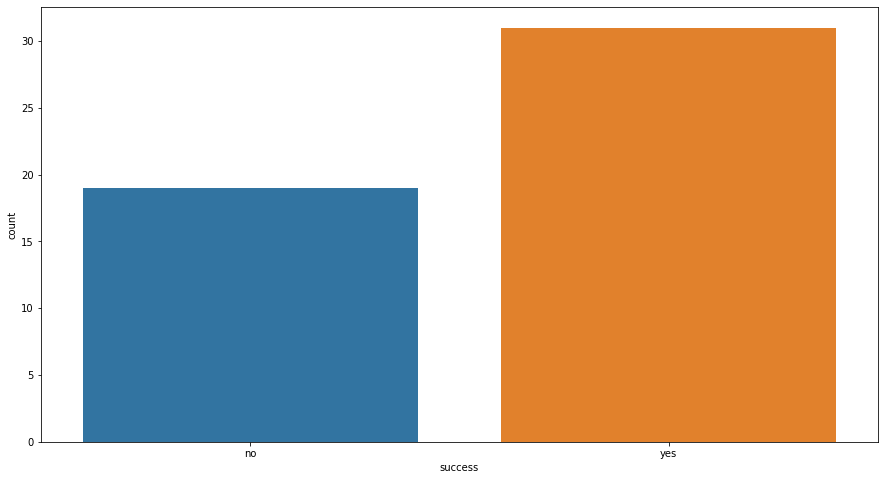

In [622]:
# Success rate

plt.figure(figsize=(15,8))
sns.countplot(wildlife_tracker['success'])

## Multivariate Analysis
### Categorical

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


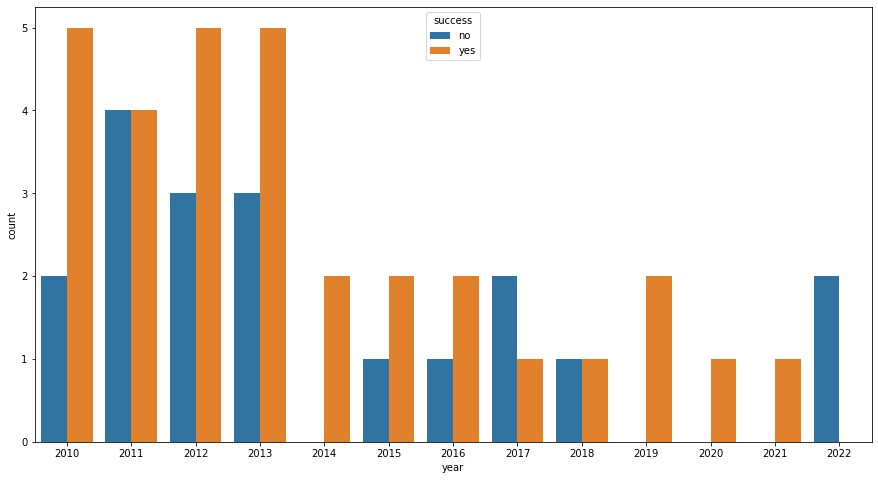

In [623]:
# Year hue on success rates
 
plt.figure(figsize=(15,8))
sns.countplot(wildlife_tracker['year'],hue=wildlife_tracker['success'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


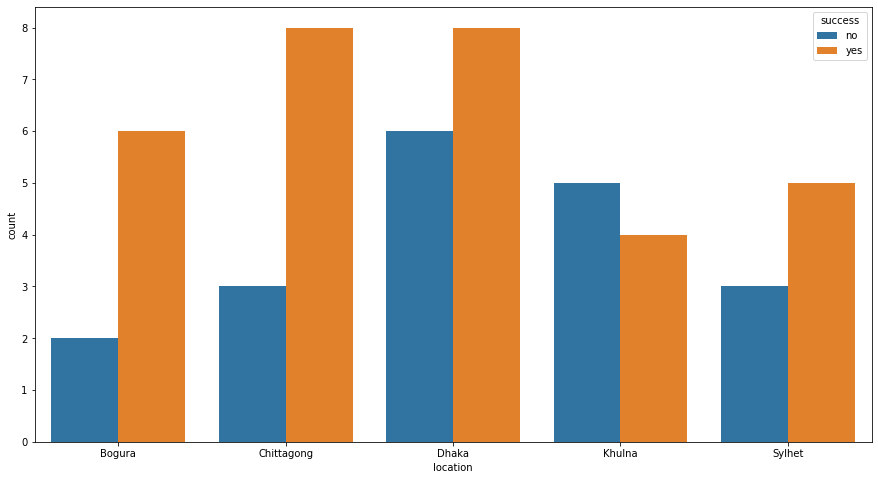

In [624]:
# Location hue on success rates
 
plt.figure(figsize=(15,8))
sns.countplot(wildlife_tracker['location'],hue=wildlife_tracker['success'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


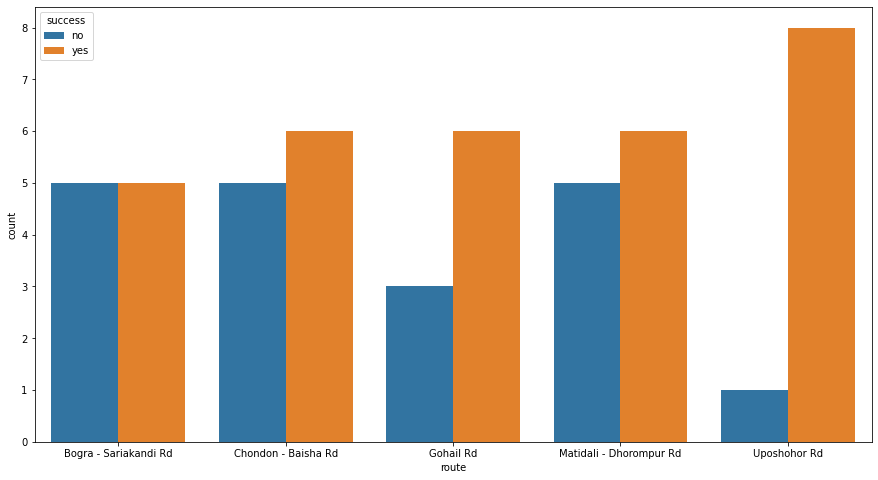

In [625]:
# Route hue on success rates
 
plt.figure(figsize=(15,8))
sns.countplot(wildlife_tracker['route'],hue=wildlife_tracker['success'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


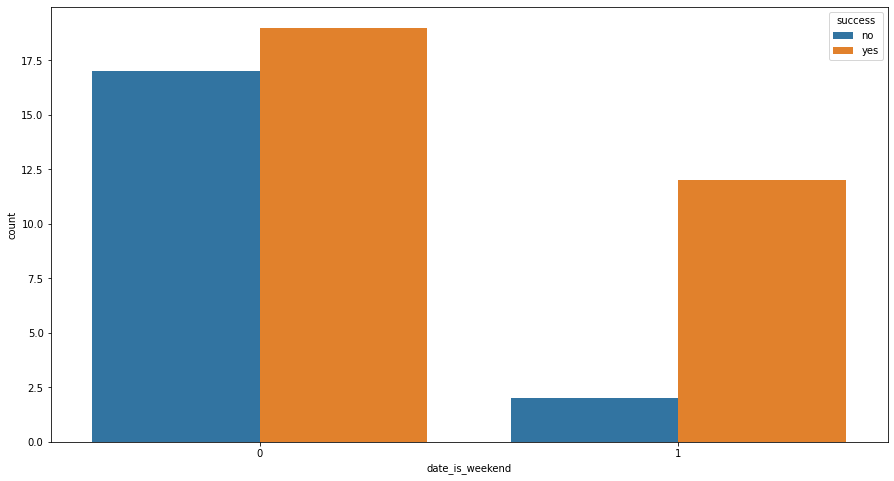

In [626]:
# Weekend hue on success rates
 
plt.figure(figsize=(15,8))
sns.countplot(wildlife_tracker['date_is_weekend'],hue=wildlife_tracker['success'])

### Numerical

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


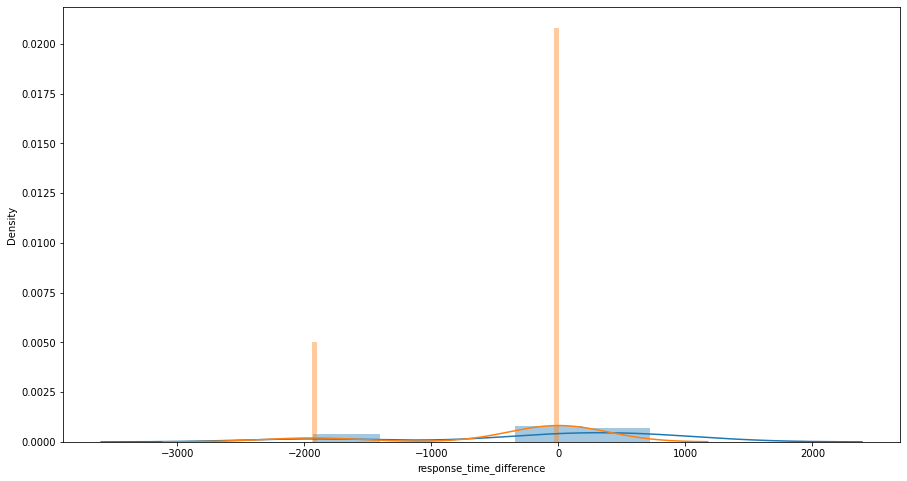

In [627]:
# Success rate relation with respond time

plt.figure(figsize=(15,8))
sns.distplot(wildlife_tracker[wildlife_tracker['success']=='no']['response_time_difference'])
sns.distplot(wildlife_tracker[wildlife_tracker['success']=='yes']['response_time_difference'])

## Converting Categorical Features 

# Classification

In [628]:
# input features

f = pd.get_dummies(data = wildlife_tracker, columns = ['animal_type', 'location', 'route'],drop_first=True) # Applying categorical encoding
features = f.drop(['scientific_name', 'average_lifespan' , 'request_time', 'help_center_response_time', 'request_udapte_time', 'year', 'success'], axis=1)
features.head()

,date_is_weekend,response_time_difference,animal_type_Dog,animal_type_Fox,animal_type_Hawk,animal_type_Lizard,animal_type_Tiger,animal_type_White-tailed Eagle,location_Chittagong,location_Dhaka,location_Khulna,location_Sylhet,route_Chondon - Baisha Rd,route_Gohail Rd,route_Matidali - Dhorompur Rd,route_Uposhohor Rd
0,1,0.283333,1,0,0,0,0,0,0,1,0,0,0,0,0,0
1,1,0.566667,0,0,0,0,0,0,1,0,0,0,0,0,0,1
2,0,24.000000,0,0,1,0,0,0,0,0,1,0,0,1,0,0
3,0,0.150000,0,0,0,0,0,1,0,0,0,0,0,0,1,0
4,0,0.500000,0,1,0,0,0,0,0,0,0,1,1,0,0,0


In [629]:
x = features # Collection of features
y = wildlife_tracker['success'] # Target or the labels to predict

In [630]:
# Generating numerical target columns

from sklearn.preprocessing import LabelEncoder 
le = LabelEncoder()
y = le.fit_transform(y)

In [631]:
# Train & Test dataset split

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import metrics

x_train, x_test, y_train, y_test = train_test_split(x,y,random_state =7)

## Pipeline

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


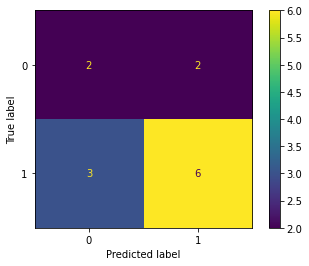

              precision    recall  f1-score   support

           0       0.40      0.50      0.44         4
           1       0.75      0.67      0.71         9

    accuracy                           0.62        13
   macro avg       0.57      0.58      0.58        13
weighted avg       0.64      0.62      0.63        13



In [632]:
# Logistic Regression

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
LR = LogisticRegression(random_state=0)
LR.fit(x_train,y_train)
y_pred = LR.predict(x_test)
metrics.plot_confusion_matrix(LR,x_test, y_test)
plt.show()
print(classification_report(y_test, y_pred))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


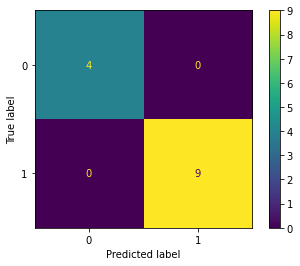

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         9

    accuracy                           1.00        13
   macro avg       1.00      1.00      1.00        13
weighted avg       1.00      1.00      1.00        13



In [633]:
# K-Nearest Neighbors Classifier

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
knnclassifier = KNeighborsClassifier(n_neighbors=3)
knnclassifier.fit(x_train,y_train)
y_pred = knnclassifier.predict(x_test)
metrics.plot_confusion_matrix(knnclassifier,x_test, y_test)
plt.show()
print(classification_report(y_test, y_pred))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


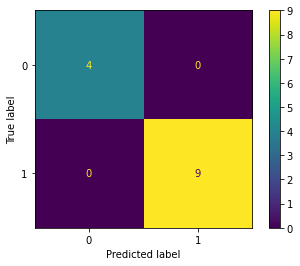

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         9

    accuracy                           1.00        13
   macro avg       1.00      1.00      1.00        13
weighted avg       1.00      1.00      1.00        13



In [634]:
# Decision Tree Classifier

from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier(random_state=7)
DT.fit(x_train,y_train)
y_pred = DT.predict(x_test)
metrics.plot_confusion_matrix(DT,x_test, y_test)
plt.show()
print(classification_report(y_test, y_pred))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


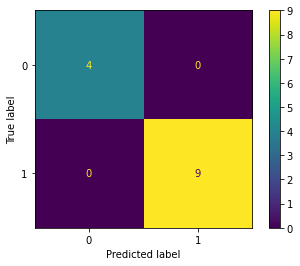

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         9

    accuracy                           1.00        13
   macro avg       1.00      1.00      1.00        13
weighted avg       1.00      1.00      1.00        13



In [635]:
# Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier()
RF.fit(x_train,y_train)
y_pred = RF.predict(x_test)
metrics.plot_confusion_matrix(RF,x_test, y_test)
plt.show()
print(classification_report(y_test, y_pred))

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


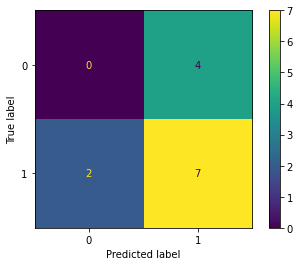

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.64      0.78      0.70         9

    accuracy                           0.54        13
   macro avg       0.32      0.39      0.35        13
weighted avg       0.44      0.54      0.48        13



In [636]:
# Support Vector Classifier

from sklearn.svm import LinearSVC
SVC = LinearSVC()
SVC.fit(x_train,y_train)
y_pred = SVC.predict(x_test)
metrics.plot_confusion_matrix(SVC,x_test, y_test)
plt.show()
print(classification_report(y_test, y_pred))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


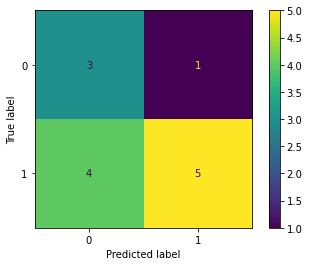

              precision    recall  f1-score   support

           0       0.43      0.75      0.55         4
           1       0.83      0.56      0.67         9

    accuracy                           0.62        13
   macro avg       0.63      0.65      0.61        13
weighted avg       0.71      0.62      0.63        13



In [637]:
# Gaussian Naive Bayes Classifier

from sklearn.naive_bayes import GaussianNB
GNB = GaussianNB()
GNB.fit(x_train,y_train)
y_pred = GNB.predict(x_test)
metrics.plot_confusion_matrix(GNB,x_test, y_test)
plt.show()
print(classification_report(y_test, y_pred))

## Evaluating & Comparing Models

In [638]:
# Classifiers

names = ["LR", "knnclassifier", "DT", "RF", "SVC", "GNB"]

classifiers = [
    LogisticRegression(random_state=0),           
    KNeighborsClassifier(n_neighbors=3),
    DecisionTreeClassifier(random_state=7),
    RandomForestClassifier(),
    LinearSVC(),
    GaussianNB()]  

In [639]:
from sklearn.metrics import accuracy_score

scores = [] # Load accuracy score

for name, clf in zip(names, classifiers):
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    validation_score = metrics.accuracy_score(y_test, y_pred)
    scores.append(validation_score)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


In [640]:
# Load data into data frame

df = pd.DataFrame()
df['name'] = names
df['validation_score'] = scores

In [641]:
# Visualizing accuracy score

cm = sns.light_palette("green", as_cmap=True)
s = df.style.background_gradient(cmap=cm)
s

,name,validation_score
0,LR,0.615385
1,knnclassifier,1.000000
2,DT,1.000000
3,RF,1.000000
4,SVC,0.538462
5,GNB,0.615385
